In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [12]:

# File to Load (Remember to change these)
city_data_to_load = "./city_data.csv"
ride_data_to_load = "./ride_data.csv"
# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
pyber_df = pd.merge(ride_data,city_data, how='left',on ="city")
pyber_df.to_csv("Pyber_data.csv")
pyber_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [4]:
# Obtain the x and y coordinates for each of the three city types
urban = pyber_df.loc[(pyber_df["type"] == "Urban")]
suburban = pyber_df.loc[(pyber_df["type"] == "Suburban")]
rural = pyber_df.loc[(pyber_df["type"] == "Rural")]
#Average Fare ($) Per City (locating citytype)
Avg_Fare_urban = urban.groupby("city")["fare"].mean()
Avg_Fare_suburban = suburban.groupby("city")["fare"].mean()
Avg_Fare_rural = rural.groupby("city")["fare"].mean()
#Total Number of Rides Per City (locating citytype)
Total_rides_urban = urban.groupby("city")["ride_id"].count()
Total_rides_suburban = suburban.groupby("city")["ride_id"].count()
Total_rides_rural = rural.groupby("city")["ride_id"].count()

Total_drivers_urban = urban.groupby("city")["driver_count"].first()
Total_drivers_suburban = suburban.groupby("city")["driver_count"].first()
Total_drivers_rural = rural.groupby("city")["driver_count"].first()

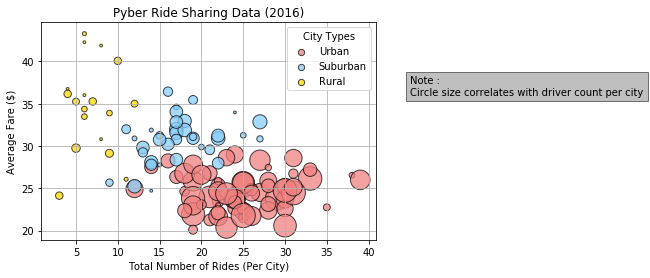

In [11]:
## SCATTER(BUBBLE) PLOT FOR PYBER RIDE SHARING DATA (2016)
##--------------------------------------------------------------------------------------------------------------------------
# Builds scatter plots for each city types
plt.scatter(Total_rides_urban, Avg_Fare_urban,s=Total_drivers_urban*8,
            marker ='o', facecolors ="lightcoral", edgecolors='black',linewidths = 0.95,alpha = 0.75, label="Urban")
plt.scatter(Total_rides_suburban, Avg_Fare_suburban,s=Total_drivers_suburban*8,
            marker ='o', facecolors ="lightskyblue", edgecolors='black',linewidths = 0.95,alpha = 0.75, label="Suburban")
plt.scatter(Total_rides_rural, Avg_Fare_rural,s=Total_drivers_rural*8,
            marker ='o', facecolors ="gold", edgecolors='black', linewidths = 0.95, alpha = 0.75, label="Rural")

# Incorporate the other graph properties
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")
plt.grid()
# Create a legend
l=plt.legend(title="City Types")
#Sets the size of legend handles
l.legendHandles[0]._sizes = [40]
l.legendHandles[1]._sizes = [40]
l.legendHandles[2]._sizes = [40]
# Incorporate a text label regarding circle size
plt.text(45,36,"Note :\nCircle size correlates with driver count per city",bbox=dict(facecolor='grey', alpha=0.5))
# shows and Saves Figure
plt.savefig("scatter.png")
plt.show()

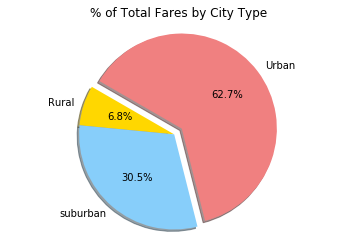

In [6]:
## % OF TOTAL FARES BY CITY TYPE
##--------------------------------------------------------------------------------------------------------------------------
Type_grouped = pyber_df.groupby("type")
# Calculate Type Percents
Fare_percent = (Type_grouped["fare"].sum() / pyber_df["fare"].sum()) * 100
Fare_percent
# Build Pie Chart
colors = ["Gold","LightSkyBlue","LightCoral"]
plt.pie(Fare_percent,explode=(0,0,0.1),labels= ["Rural","suburban","Urban"] ,autopct="%1.1f%%",shadow=True,startangle = 150,colors=colors)
plt.axis("equal")
plt.title("% of Total Fares by City Type")
# shows and Saves Figure
plt.savefig("% Total_Fares.png")
plt.show()

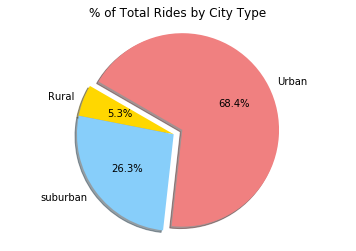

In [7]:
## % OF TOTAL RIDES BY CITY TYPE
##---------------------------------------------------------------------------------------------------------------------------
# Calculate Ride Percents
Ride_percent = (Type_grouped["ride_id"].count() / pyber_df["ride_id"].count()) * 100
Ride_percent
# Build Pie Chart
colors = ["Gold","LightSkyBlue","LightCoral"]
plt.pie(Ride_percent,explode=(0,0,0.1),labels= ["Rural","suburban","Urban"] ,autopct="%1.1f%%",shadow=True,startangle = 150,colors=colors)
plt.axis("equal")
plt.title("% of Total Rides by City Type")
# shows and Saves Figure
plt.savefig("%Total_Rides.png")
plt.show()

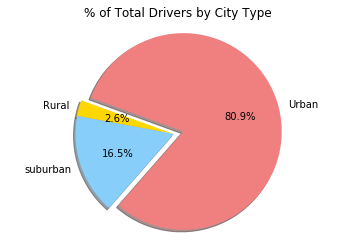

In [8]:
## % OF TOTAL DRIVERS BY CITY TYPE
##----------------------------------------------------------------------------------------------------------------------------
# Gets Driver Percents
Drivers_percent = (city_data.groupby("type")["driver_count"].sum() / city_data["driver_count"].sum())* 100
# Builds Pie Charts
plt.pie(Drivers_percent,explode=(0,0,0.1),labels= ["Rural","suburban","Urban"] ,autopct="%1.1f%%",shadow=True,startangle = 160,colors=colors)
plt.axis("equal")
plt.title("% of Total Drivers by City Type")
# shows and Saves Figure
plt.savefig("% Total_Drivers.png")
plt.show()